In [1]:
import numpy as np
import matplotlib.pyplot as plt

(300, 2)


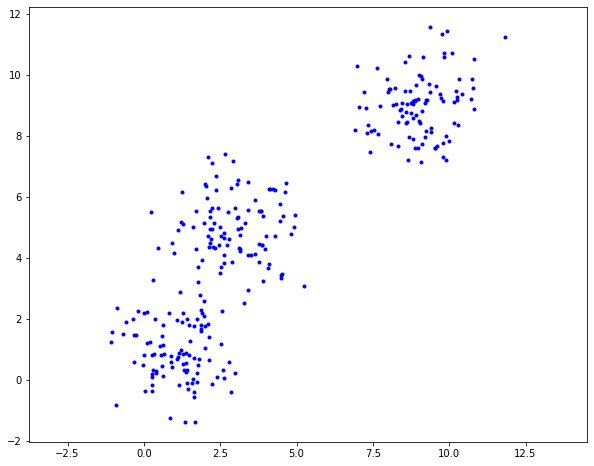

In [2]:

# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.axis('equal')
plt.show()

In [3]:
mu=X[np.random.choice(X.shape[0],3),:]
print(mu)

[[ 3.86006808  4.41073607]
 [ 0.25119615 -0.16129986]
 [ 4.50047667  3.35377586]]


In [10]:
y=np.zeros((X.shape[0],1))
for i in range(100):
    for j in range(X.shape[0]):
        candi=[]
        for k in range(mu.shape[0]):
            candi.append(np.linalg.norm(X[j]-mu[k],2))
        y[j]=np.argmin(candi)
    new_mu=np.array([np.ravel(np.mean(X[np.where(y==k)[0]],axis=0)) for k in range(mu.shape[0])])
    print(new_mu)
    print(np.linalg.norm(mu-new_mu,1))
    mu=new_mu.copy()
    
            
        

[[5.97061171 7.07578641]
 [1.00497814 0.82450521]
 [3.98069696 3.25614038]]
3.7484908959981693
[[8.17657108 8.59948414]
 [1.04677738 0.95990711]
 [2.86771168 4.6310009 ]]
3.360743898889949
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.9548069859606905
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]
0.0
[[9.01039051 8.98648792]
 [1.06788579 0.93897305]
 [2.96759082 4.9756028 ]]


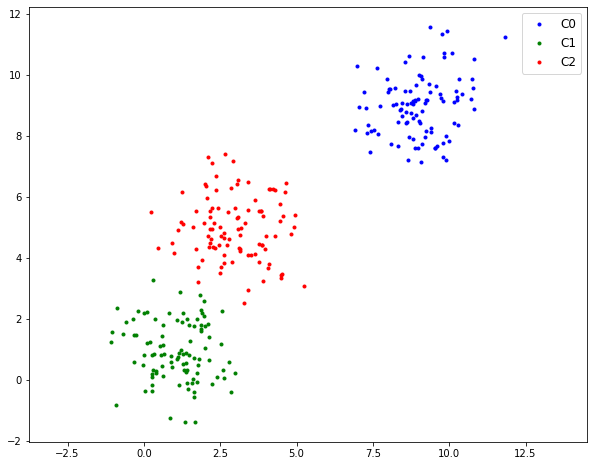

In [12]:
x0=np.where(y==0)[0]
x1=np.where(y==1)[0]
x2=np.where(y==2)[0]

plt.figure(figsize = (10, 8))
plt.plot(X[x0,0], X[x0,1], 'b.', label = 'C0')
plt.plot(X[x1,0], X[x1,1], 'g.', label = 'C1')
plt.plot(X[x2,0], X[x2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

In [13]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

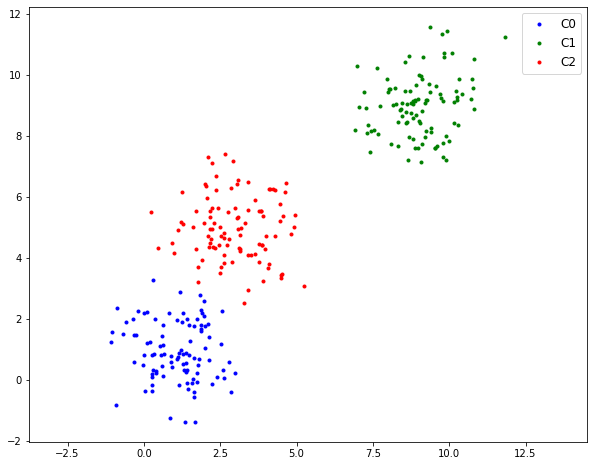

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], 'b.', label = 'C0')
plt.plot(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], 'g.', label = 'C1')
plt.plot(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

C:\Users\hjhjpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
No handles with labels found to put in legend.


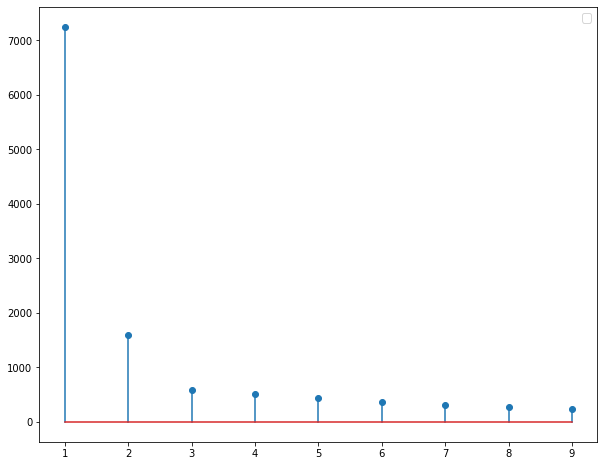

In [15]:
cost=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    cost.append(abs(kmeans.score(X)))
plt.figure(figsize = (10, 8))
plt.stem(range(1,10),cost)
plt.legend(fontsize = 12)
plt.show()

(538, 538, 3)


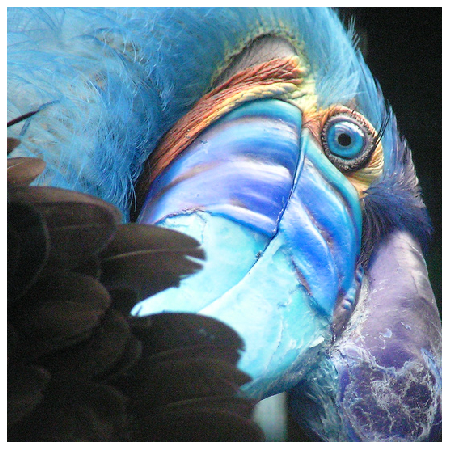

In [17]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./bird_large.jpg')
print(img.shape)

plt.figure(figsize = (8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
col_img=img.reshape(-1,3)

In [19]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(col_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:

for i in range(col_img.shape[0]):
    col_img[i]=np.round(kmeans.cluster_centers_[kmeans.labels_[i]]).astype('uint8')

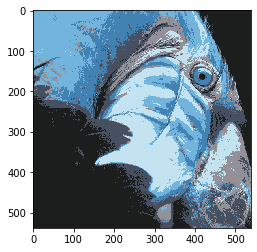

In [28]:
plt.imshow(col_img.reshape(538,538,3))

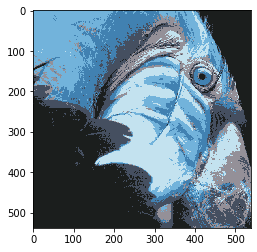

In [24]:
plt.imshow(img)